In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/ekaterinagorbunova/Desktop/Проекты DS/personal_budget_transactions.csv', delimiter=';', skiprows=1)

In [3]:
df = df.drop(index=[1789, 1792, 1797, 1791])

In [4]:
df["Категория"] = df["Категория"].replace("Бьюти процедуры", "Бьюти-процедуры")
df["Подкатегория"] = df["Подкатегория"].replace("Электрика", "Электричка")
df.loc[(df["Категория"] == "Продукты питания и доставка") & (df["Подкатегория"] == "Электричка"), "Категория"] = "Транспорт"
df.loc[(df["Категория"] == "Продукты питания и доставка") & (df["Подкатегория"] == "ТЕТРОН"), "Категория"] = "Оплата интернет"
df.loc[(df["Категория"] == "Продукты питания и доставка") & (df["Подкатегория"] == "Перевод со своего счета"), "Категория"] = "Пополнение"
df.loc[(df["Категория"] == "Продукты питания и доставка") & (df["Подкатегория"] == "FixPrice"), "Категория"] = "Быт"
df.loc[(df["Категория"] == "Продукты питания и доставка") & (df["Подкатегория"] == "Аптека"), "Категория"] = "Здоровье"

In [5]:
df

,Дата и время операции,Сумма в валюте операции,Описание операции,Номер карты,Дата,Категория,Подкатегория
0,2025-06-14 12:02:00,-3000.00,Внешний перевод по номеру телефона +79151334588,6007,2025-06-14,Развлечения и подарки,Цветы
1,2025-06-13 22:42:00,-122.00,Оплата в Сервисы Яндекса,6007,2025-06-13,Транспорт,Такси
2,2025-06-13 16:49:00,-175.00,Оплата в Сервисы Яндекса,6007,2025-06-13,Транспорт,Такси
3,2025-06-13 16:41:00,-739.69,Оплата в PYATEROCHKA 8328 Voskresensk RUS,7297,2025-06-13,Продукты питания и доставка,Пятерочка
4,2025-06-13 14:47:00,-304.00,Оплата в CPPK-2001020BPA20 Lyubercy RUS,7297,2025-06-13,Прочее,Электричка
...,...,...,...,...,...,...,...
1874,2024-06-16 14:18:00,-195.00,Оплата в Автодор,6007,2024-06-16,Быт,Прочее
1875,2024-06-15 10:31:00,-5000.00,Внешний перевод по номеру телефона +79032243654,6007,2024-06-15,Быт,Прочее
1876,2024-06-14 20:40:00,-210.77,Оплата в KRASNOE&BELOE Voskresensk RUS,6007,2024-06-14,Вредные привычки,Красное и белое
1877,2024-06-14 19:36:00,-3080.00,Оплата в Gold Apple Ekaterinburg RU,6007,2024-06-14,Развлечения и подарки,Подарок на ДР


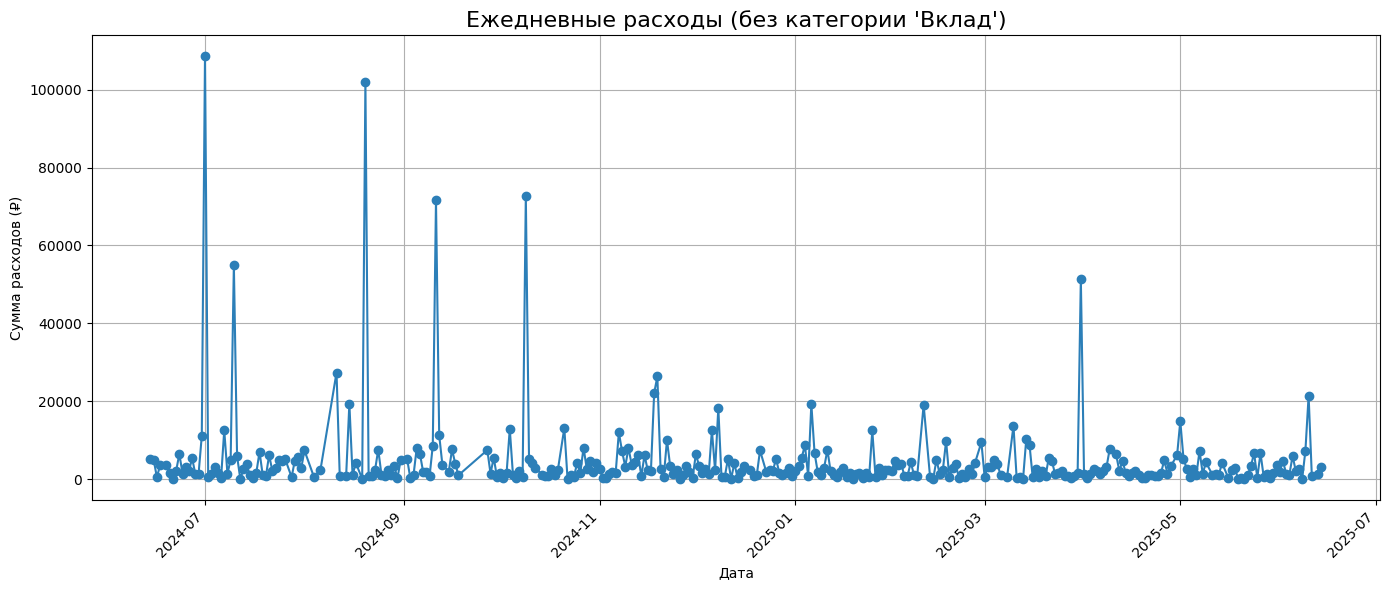

In [6]:
# Убедимся, что дата в правильном формате
df["Дата"] = pd.to_datetime(df["Дата"])

# Исключаем строки с категорией "Вклад"
df_filtered = df[(df["Сумма в валюте операции"] < 0) & (df["Категория"] != "Вклад")]

# Группируем по дате и суммируем расходы
daily_expenses = df_filtered.groupby("Дата")["Сумма в валюте операции"].sum()

# Меняем знак на положительный для наглядности
daily_expenses = -daily_expenses

# Строим график
plt.figure(figsize=(14, 6))
daily_expenses.plot(kind="line", marker="o", linestyle='-', color="#2c7fb8")

plt.title("Ежедневные расходы (без категории 'Вклад')", fontsize=16)
plt.xlabel("Дата")
plt.ylabel("Сумма расходов (₽)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


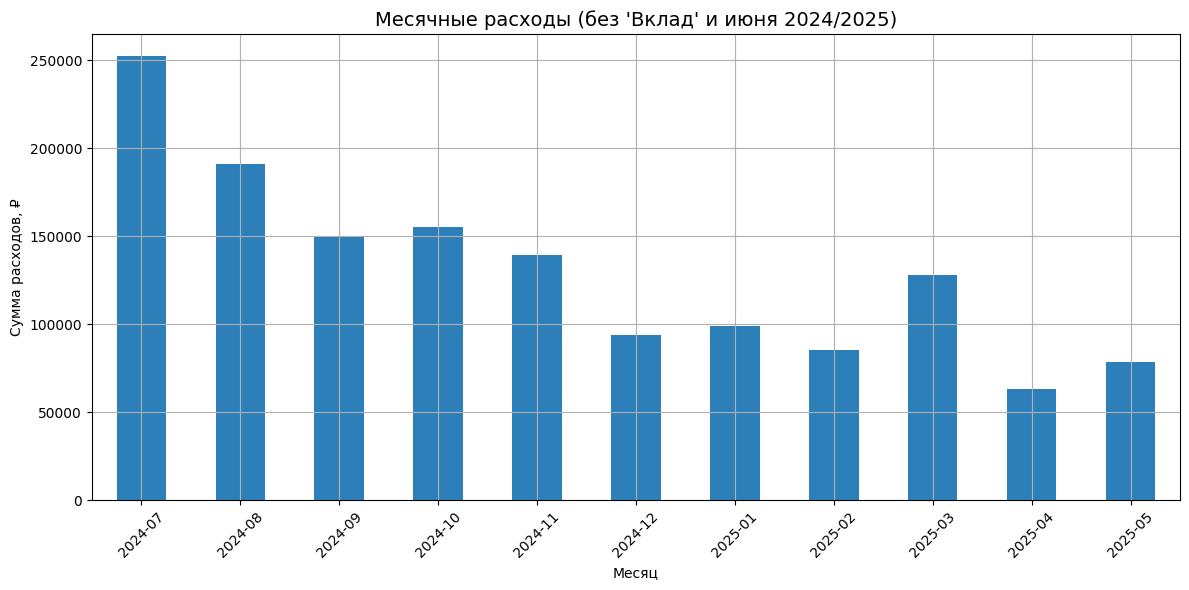

In [7]:
import matplotlib.pyplot as plt

# Убедимся, что дата в правильном формате
df["Дата"] = pd.to_datetime(df["Дата"])

# Фильтрация: исключаем "Вклад" и месяцы июнь 2024 и июнь 2025
df_filtered = df[
    (df["Категория"] != "Вклад") &
    (df["Дата"].dt.month != 6) &
    (df["Дата"].dt.year != 2024 | (df["Дата"].dt.month != 6)) &
    (df["Дата"].dt.year != 2025 | (df["Дата"].dt.month != 6)) &
    (df["Сумма в валюте операции"] < 0)  # только расходы
]

# Группировка по месяцу
df_filtered["Месяц"] = df_filtered["Дата"].dt.to_period("M")
monthly_expenses = df_filtered.groupby("Месяц")["Сумма в валюте операции"].sum()
monthly_expenses = -monthly_expenses  # расходы положительными значениями

# Построение графика
plt.figure(figsize=(12, 6))
monthly_expenses.plot(kind="bar", color="#2c7fb8")

plt.title("Месячные расходы (без 'Вклад' и июня 2024/2025)", fontsize=14)
plt.ylabel("Сумма расходов, ₽")
plt.xlabel("Месяц")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


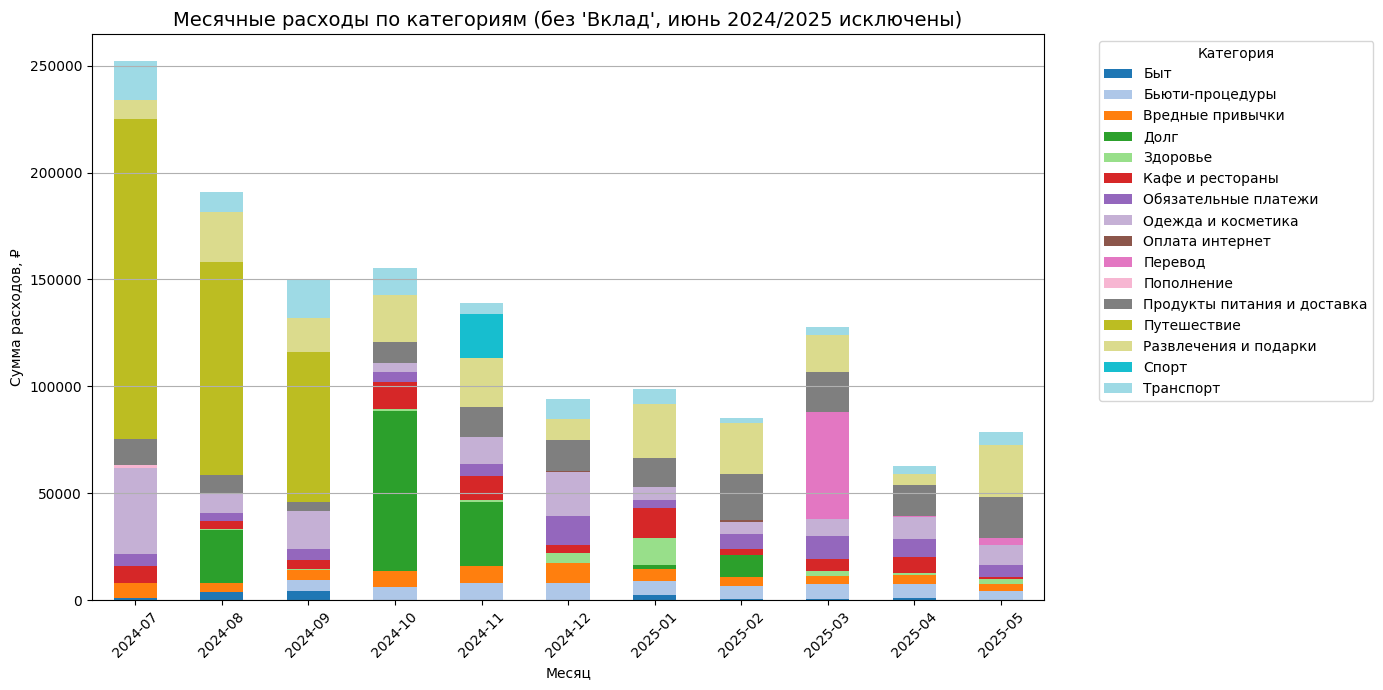

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Убедимся, что дата в нужном формате
df["Дата"] = pd.to_datetime(df["Дата"])

# Убираем "Вклад" и июнь 2024/2025
df_filtered = df[
    (df["Категория"] != "Вклад") &
    ~( (df["Дата"].dt.year == 2024) & (df["Дата"].dt.month == 6) ) &
    ~( (df["Дата"].dt.year == 2025) & (df["Дата"].dt.month == 6) ) &
    (df["Сумма в валюте операции"] < 0)  # только расходы
]

# Добавим колонку "Месяц"
df_filtered["Месяц"] = df_filtered["Дата"].dt.to_period("M")

# Группируем по месяцу и категории
pivot_table = df_filtered.groupby(["Месяц", "Категория"])["Сумма в валюте операции"].sum().unstack(fill_value=0)

# Преобразуем отрицательные расходы в положительные значения для отображения
pivot_table = -pivot_table

# Строим график
pivot_table.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")
plt.title("Месячные расходы по категориям (без 'Вклад', июнь 2024/2025 исключены)", fontsize=14)
plt.ylabel("Сумма расходов, ₽")
plt.xlabel("Месяц")
plt.xticks(rotation=45)
plt.legend(title="Категория", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis="y")
plt.show()


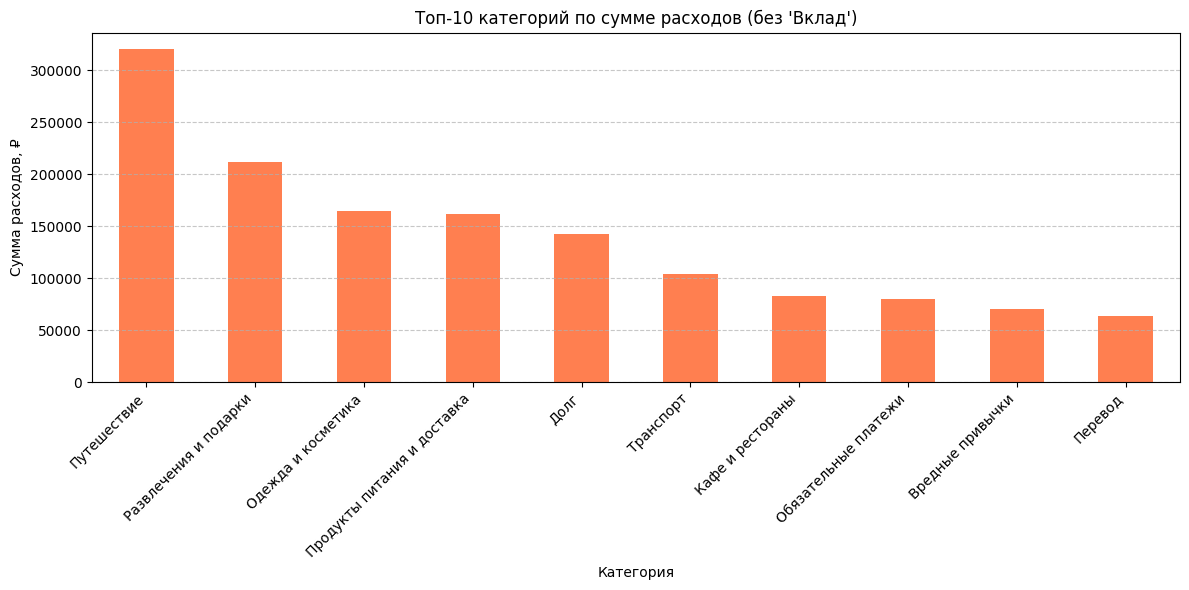

In [9]:
import matplotlib.pyplot as plt

# Фильтруем расходы (отрицательные суммы) и исключаем категорию "Вклад"
expenses = df[(df["Сумма в валюте операции"] < 0) & (df["Категория"] != "Вклад")]

# Группируем по категории и считаем сумму расходов по каждой
category_expenses = expenses.groupby("Категория")["Сумма в валюте операции"].sum().abs()

# Сортируем и берём топ-10
top_10_categories = category_expenses.sort_values(ascending=False).head(10)

# Строим график
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='bar', color='coral')
plt.title("Топ-10 категорий по сумме расходов (без 'Вклад')")
plt.ylabel("Сумма расходов, ₽")
plt.xlabel("Категория")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Тренды расходов и доходов

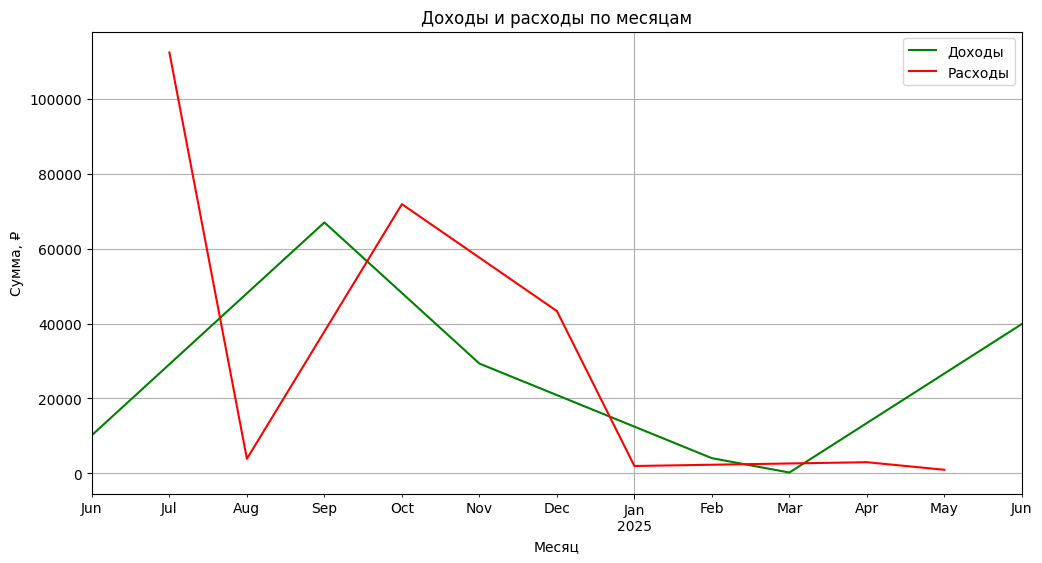

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем колонку с датой в datetime, если еще не сделано
df['Дата'] = pd.to_datetime(df['Дата'])

# Группируем по месяцу и году, суммируем суммы
monthly_summary = df.groupby(df['Дата'].dt.to_period('M'))['Сумма в валюте операции'].sum()

# Разделим доходы и расходы
monthly_income = monthly_summary[monthly_summary > 0]
monthly_expenses = monthly_summary[monthly_summary < 0].abs()

# Визуализация
plt.figure(figsize=(12,6))
monthly_income.plot(label='Доходы', color='green')
monthly_expenses.plot(label='Расходы', color='red')
plt.title('Доходы и расходы по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма, ₽')
plt.legend()
plt.grid(True)
plt.show()


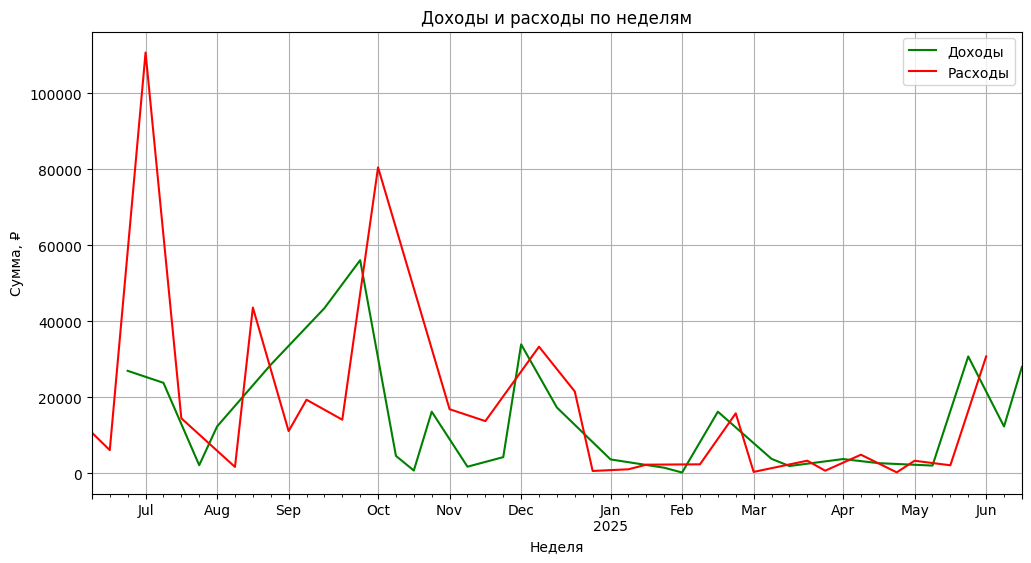

In [11]:
# Группируем по году и номеру недели
weekly_summary = df.groupby(df['Дата'].dt.to_period('W'))['Сумма в валюте операции'].sum()

weekly_income = weekly_summary[weekly_summary > 0]
weekly_expenses = weekly_summary[weekly_summary < 0].abs()

plt.figure(figsize=(12,6))
weekly_income.plot(label='Доходы', color='green')
weekly_expenses.plot(label='Расходы', color='red')
plt.title('Доходы и расходы по неделям')
plt.xlabel('Неделя')
plt.ylabel('Сумма, ₽')
plt.legend()
plt.grid(True)
plt.show()


#### Анализ подкатегорий

Подкатегория
Пятерочка       49008.88
Дикси           29730.74
Самокат         28831.00
Рынок           21783.00
Прочее          14076.60
Магнит           9471.75
Купер            2267.00
Атак             1791.44
Перекресток      1779.94
Вкусвилл          678.00
Вода              660.00
Торт              641.00
Бургер            419.97
Азбука вкуса      189.00
Name: Сумма в валюте операции, dtype: float64


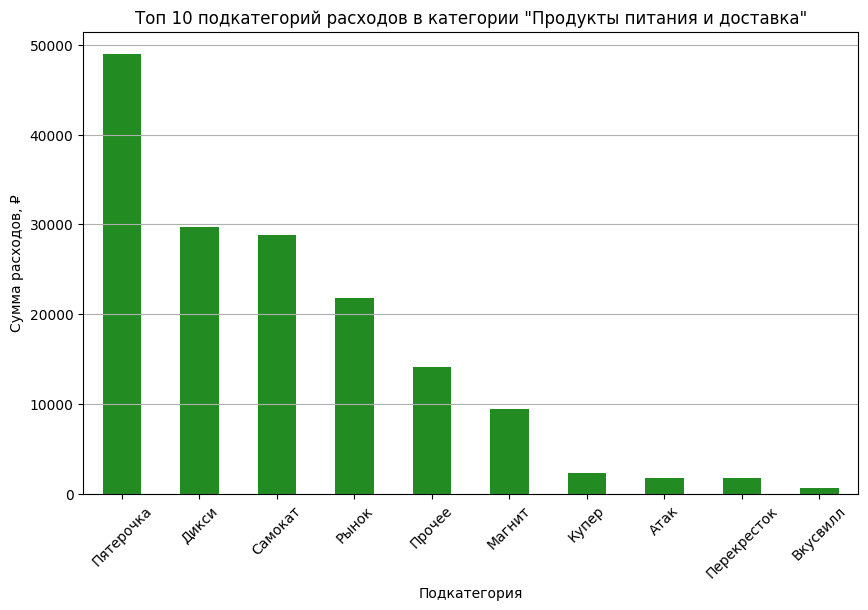

In [12]:
import matplotlib.pyplot as plt

# Фильтруем расходы (отрицательные суммы), исключаем категорию "Вклад"
expenses = df[(df["Сумма в валюте операции"] < 0) & (df["Категория"] == "Продукты питания и доставка")]

# Группируем по подкатегории и суммируем абсолютные значения расходов
subcategory_expenses = expenses.groupby('Подкатегория')["Сумма в валюте операции"].sum().abs().sort_values(ascending=False)

# Выведем топ подкатегорий
print(subcategory_expenses)

# Визуализация (топ 10 подкатегорий)
top_subcategories = subcategory_expenses.head(10)

plt.figure(figsize=(10,6))
top_subcategories.plot(kind='bar', color='forestgreen')
plt.title('Топ 10 подкатегорий расходов в категории "Продукты питания и доставка"')
plt.ylabel('Сумма расходов, ₽')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



Подкатегория
Прочее                   95418.84
МК                       16680.00
Подарок Егору            15000.00
Билет на концерт         13740.00
Золотое яблоко           11237.68
Подарок на ДР             9995.00
Flowwow                   9586.00
Подарок                   8750.00
Цветы                     5740.00
Снятие наличных           5000.00
Экскурсия                 4863.14
Подарок Олесе             4000.00
Подарок Жене              3000.00
Вино                      2829.95
Обучение                  1900.00
Оплата гостиницы          1635.00
Шампанское                 969.99
Развлечения и подарки      600.00
Кино                       570.00
Аренда самоката            265.76
Аренда блока питания       100.00
Name: Сумма в валюте операции, dtype: float64


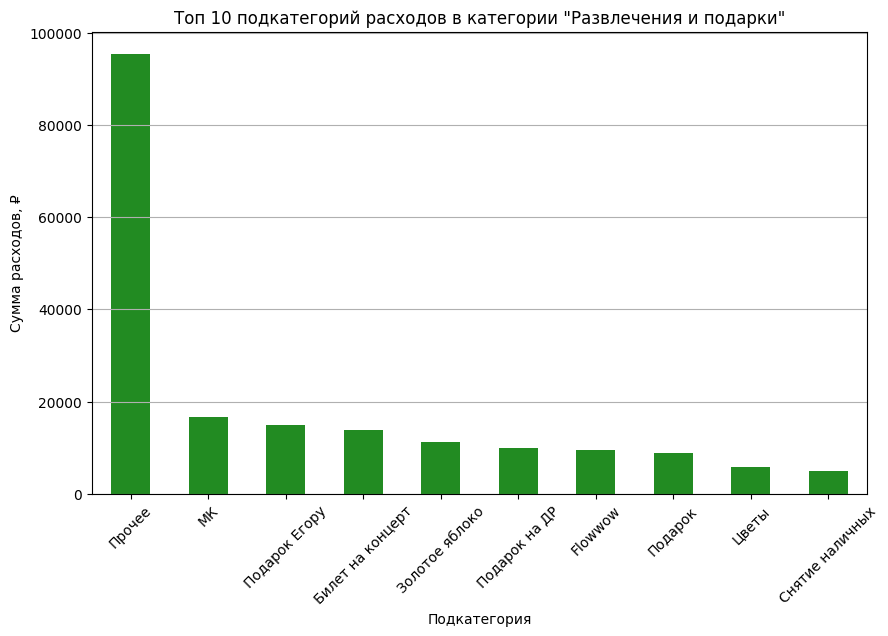

In [17]:
# Фильтруем расходы (отрицательные суммы), исключаем категорию "Вклад"
expenses = df[(df["Сумма в валюте операции"] < 0) & (df["Категория"] == "Развлечения и подарки")]

# Группируем по подкатегории и суммируем абсолютные значения расходов
subcategory_expenses = expenses.groupby('Подкатегория')["Сумма в валюте операции"].sum().abs().sort_values(ascending=False)

# Выведем топ подкатегорий
print(subcategory_expenses)

# Визуализация (топ 10 подкатегорий)
top_subcategories = subcategory_expenses.head(10)

plt.figure(figsize=(10,6))
top_subcategories.plot(kind='bar', color='forestgreen')
plt.title('Топ 10 подкатегорий расходов в категории "Развлечения и подарки"')
plt.ylabel('Сумма расходов, ₽')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



#### Средний чек и частота транзакций

In [13]:
# Средняя сумма покупки по категориям (учитываем только расходы — суммы < 0)
average_check = df[df["Сумма в валюте операции"] < 0].groupby("Категория")["Сумма в валюте операции"].mean().abs().sort_values(ascending=False)

print("Средний чек по категориям:")
print(average_check)


Средний чек по категориям:
Категория
Путешествие                    80000.000000
Долг                           20285.714286
Перевод                        12793.000000
Спорт                          10500.000000
Вклад                           7850.108558
Бьюти-процедуры                 3007.500000
Развлечения и подарки           2463.736744
Одежда и косметика              1555.678491
Здоровье                        1074.646000
Обязательные платежи             922.187816
Оплата интернет                  800.000000
Быт                              786.868333
Кафе и рестораны                 783.150943
Вредные привычки                 767.480659
Пополнение                       560.500000
Продукты питания и доставка      447.585374
Прочее                           304.000000
Транспорт                        294.996477
Name: Сумма в валюте операции, dtype: float64


📉 Прогноз расходов на June 2025: 84,929.53 ₽


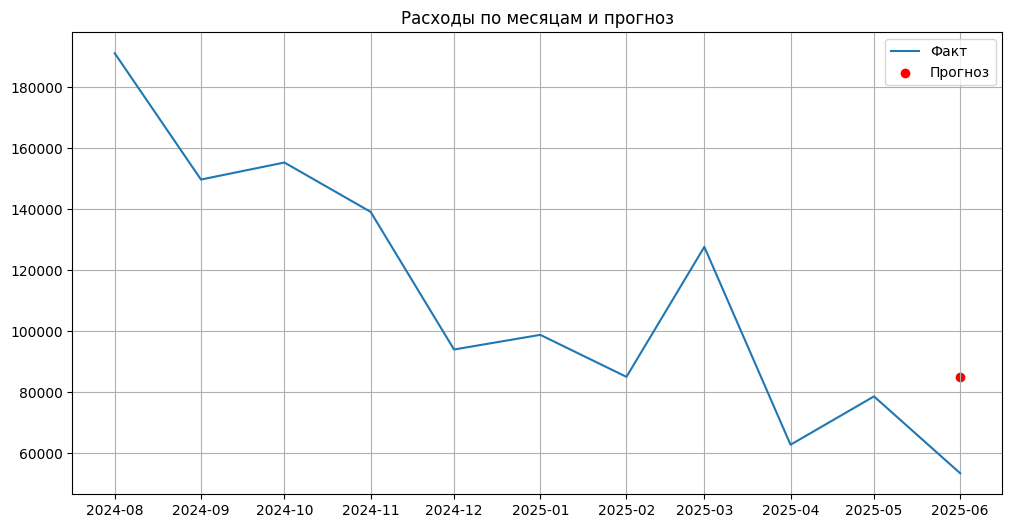

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 1. Подготовим данные
df_model = df[
    (df["Категория"] != "Вклад") &
    (df["Сумма в валюте операции"] < 0)
].copy()

df_model["Дата"] = pd.to_datetime(df_model["Дата"])
df_model["Сумма"] = df_model["Сумма в валюте операции"].abs()

monthly = df_model.groupby(df_model["Дата"].dt.to_period("M"))["Сумма"].sum().reset_index()
monthly["Дата"] = monthly["Дата"].dt.to_timestamp()

# 2. Создадим признаки
monthly["year"] = monthly["Дата"].dt.year
monthly["month"] = monthly["Дата"].dt.month
monthly["lag1"] = monthly["Сумма"].shift(1)
monthly["lag2"] = monthly["Сумма"].shift(2)
monthly["ma3"] = monthly["Сумма"].rolling(3).mean()

# Удалим строки с NaN
monthly = monthly.dropna().reset_index(drop=True)

# 3. Train/Test Split
train = monthly[:-1]
test = monthly[-1:]

X_train = train[["year", "month", "lag1", "lag2", "ma3"]]
y_train = train["Сумма"]

X_test = test[["year", "month", "lag1", "lag2", "ma3"]]

# 4. Обучим модель
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Прогноз
y_pred = model.predict(X_test)

print(f"📉 Прогноз расходов на {test['Дата'].iloc[0].strftime('%B %Y')}: {y_pred[0]:,.2f} ₽")

# (опционально) сравним с фактическими значениями, если известны
# print(f"Фактические расходы: {test['Сумма'].values[0]}")

# 6. График
plt.figure(figsize=(12, 6))
plt.plot(monthly["Дата"], monthly["Сумма"], label="Факт")
plt.scatter(test["Дата"], y_pred, color="red", label="Прогноз")
plt.title("Расходы по месяцам и прогноз")
plt.legend()
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from current font.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


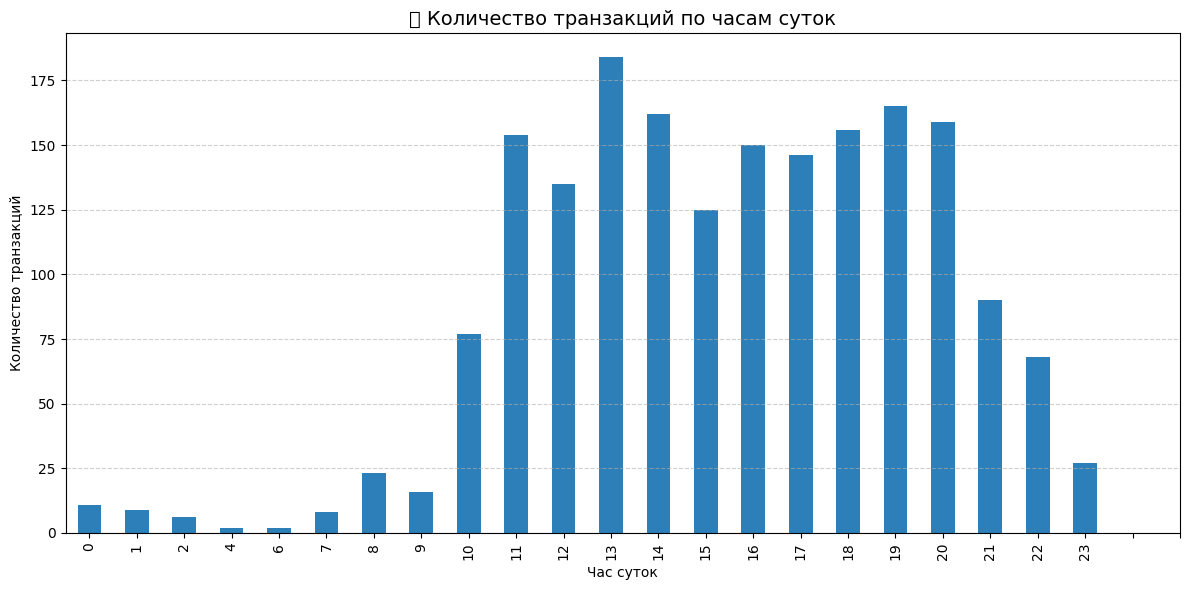

In [15]:
import matplotlib.pyplot as plt

# Убедимся, что дата — в формате datetime
df["Дата и время операции"] = pd.to_datetime(df["Дата и время операции"])

# Извлекаем час из временной метки
df["Час"] = df["Дата и время операции"].dt.hour

# Считаем количество транзакций по каждому часу
transactions_by_hour = df["Час"].value_counts().sort_index()

# Визуализируем
plt.figure(figsize=(12, 6))
transactions_by_hour.plot(kind="bar", color="#2c7fb8")
plt.title("🕒 Количество транзакций по часам суток", fontsize=14)
plt.xlabel("Час суток")
plt.ylabel("Количество транзакций")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


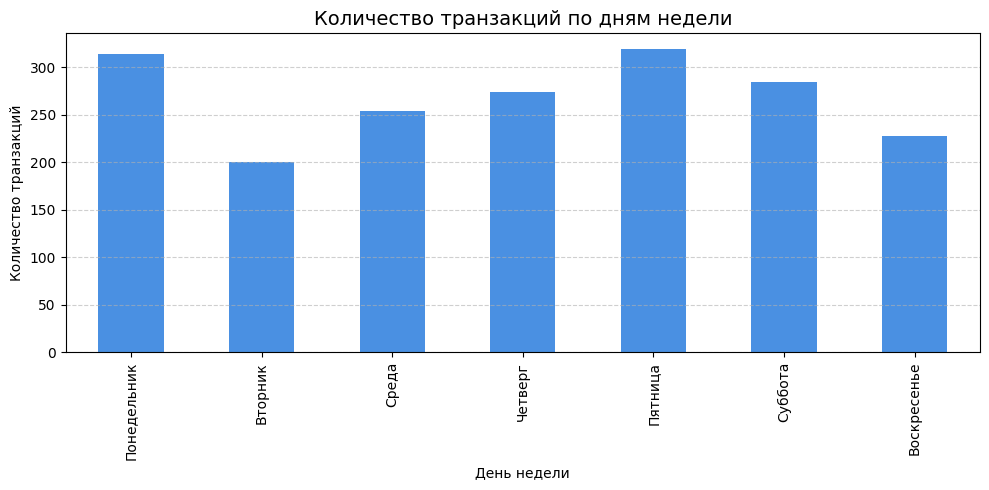

In [16]:
import matplotlib.pyplot as plt

# Убедимся, что дата — в datetime формате
df["Дата и время операции"] = pd.to_datetime(df["Дата и время операции"])

# Получаем день недели (0=понедельник, 6=воскресенье)
df["День недели"] = df["Дата и время операции"].dt.dayofweek

# Считаем количество транзакций по дням недели
transactions_by_weekday = df["День недели"].value_counts().sort_index()

# Маппинг чисел дней на названия
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

# Визуализация
plt.figure(figsize=(10, 5))
transactions_by_weekday.index = [days[i] for i in transactions_by_weekday.index]
transactions_by_weekday.plot(kind="bar", color="#4a90e2")
plt.title("Количество транзакций по дням недели", fontsize=14)
plt.xlabel("День недели")
plt.ylabel("Количество транзакций")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


#### Модель предсказания категорий 

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


# 1. Отбираем размеченные строки
df_labeled = df[df['Категория'].notna() & (df['Категория'] != '0')]

# 2. Признаки
df_labeled["Время"] = pd.to_datetime(df_labeled["Дата и время операции"])
df_labeled["Час"] = df_labeled["Время"].dt.hour
df_labeled["День недели"] = df_labeled["Время"].dt.dayofweek
df_labeled["Сумма"] = df_labeled["Сумма в валюте операции"].astype(float)

# 3. Целевая переменная и признаки
X = df_labeled[["Описание операции", "Час", "День недели", "Сумма"]]
y = df_labeled["Категория"]

# 4. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Преобразование
preprocessor = ColumnTransformer(
    transformers=[
        ("desc", TfidfVectorizer(max_features=300), "Описание операции"),
        ("num", StandardScaler(), ["Час", "День недели", "Сумма"])
    ]
)

# 6. Модель
pipeline = Pipeline([
    ("features", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

# 7. Обучение
pipeline.fit(X_train, y_train)

# 8. Предсказание
y_pred = pipeline.predict(X_test)

# 9. Метрики
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8053333333333333

Classification Report:
                              precision    recall  f1-score   support

                        Быт       0.20      0.25      0.22         4
            Бьюти-процедуры       0.00      0.00      0.00         1
                      Вклад       0.92      0.93      0.92        59
           Вредные привычки       0.84      0.95      0.89        22
                       Долг       0.00      0.00      0.00         3
                   Здоровье       0.88      0.78      0.82         9
           Кафе и рестораны       0.67      0.67      0.67        30
       Обязательные платежи       0.94      0.88      0.91        17
         Одежда и косметика       0.36      0.56      0.44        16
            Оплата интернет       0.00      0.00      0.00         1
                    Перевод       0.00      0.00      0.00         1
                 Пополнение       0.96      0.98      0.97        51
Продукты питания и доставка       0.87      0.84

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [21]:
pip install plotly


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import plotly.express as px
# Удаляем строки, где Категория — "Вклад" или "Пополнение"
df = df[~df["Категория"].isin(["Вклад", "Пополнение"])].reset_index(drop=True)


fig = px.bar(
    df.groupby("Категория")["Сумма в валюте операции"].sum().sort_values(ascending=False).reset_index(),
    x="Категория", y="Сумма в валюте операции",
    title="Расходы по категориям",
    labels={"Сумма в валюте операции": "Сумма, ₽"},
    color="Категория"
)
fig.show()
